OASIS INFOBYTE INTERNSHIP

**TASK:4 EMAIL SPAM DETECTION WITH MACHINE LEARNING**

BY: *Vaishnavi Jadhav*  |  Email: vaishnavisj123@gmail.com 

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Load the Dataset**

In [2]:
spam_df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [3]:
spam_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
spam_df.shape

(5572, 5)

In [5]:
spam_df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
spam_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
spam_df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

# **Drop Unnecessary Columns**

In [9]:
spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
spam_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Renaming Columns**

In [11]:
spam_df=spam_df.rename(columns={'v1':'Target','v2':'Message'})
spam_df

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Check Null & Duplicate Values**

In [12]:
spam_df.isnull().sum()

Target     0
Message    0
dtype: int64

In [13]:
spam_df.duplicated().sum()

403

In [14]:
spam_df.dropna(inplace=True)

In [15]:
spam_df.isnull().sum() #checking if null values are dropped

Target     0
Message    0
dtype: int64

In [16]:
spam_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [17]:
spam_df.drop_duplicates(keep='first',inplace=True)
spam_df.duplicated().sum()

0

In [18]:
spam_df.size

10338

In [19]:
spam_df.shape

(5169, 2)

# **Label Encoding**

In [20]:
# Encode labels (ham = 0, spam = 1)
spam_df['label'] = spam_df['Target'].map({'ham': 0, 'spam': 1})

In [21]:
spam_df

,Target,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


# **Data Visualization**

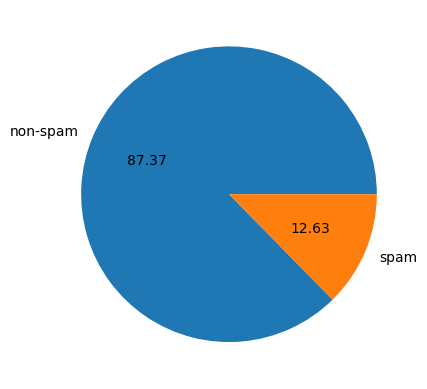

In [22]:
plt.pie(spam_df['Target'].value_counts(), labels = ['non-spam', 'spam'], autopct = "%0.2f")
plt.show()

# **Training Model**

In [23]:
X = spam_df['Message']
Y = spam_df['Target']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)  #splitting data into train and test

In [25]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(5169,)
(4135,)
(1034,)


# **Feature Extraction**

In [26]:
# Feature Extraction - TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# **Logistic Regression**

In [27]:
# Model training
model = LogisticRegression()
model.fit(X_train_tfidf, Y_train)

LogisticRegression()

# **Prediction**

In [28]:
# Predictions
y_pred = model.predict(X_test_tfidf)

# **Model Evaluation**

In [29]:
print("Sample Predictions:", y_pred[:5])
print("Actual Labels:", Y_test[:5].values)

Sample Predictions: ['ham' 'ham' 'ham' 'ham' 'ham']
Actual Labels: ['ham' 'ham' 'ham' 'ham' 'ham']


In [30]:
# Evaluation
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.9671179883945842


In [31]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Confusion Matrix:
 [[892   2]
 [ 32 108]]


In [32]:
print("Classification Report:\n", classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       894
        spam       0.98      0.77      0.86       140

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



In [33]:
def predict_message(message):
    # Transform the message using the trained TF-IDF vectorizer
    message_tfidf = tfidf_vectorizer.transform([message])
    
    # Predict using the trained model
    prediction = model.predict(message_tfidf)
    
    return prediction[0]

# Example usage
new_message = "Congratulations! You've won a free ticket to the Bahamas. Call now!"
print("Prediction:", predict_message(new_message))


Prediction: spam
